<a href="https://colab.research.google.com/github/jadams156530/CS4410/blob/main/Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<Figure size 1600x900 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

<Figure size 1600x900 with 0 Axes>

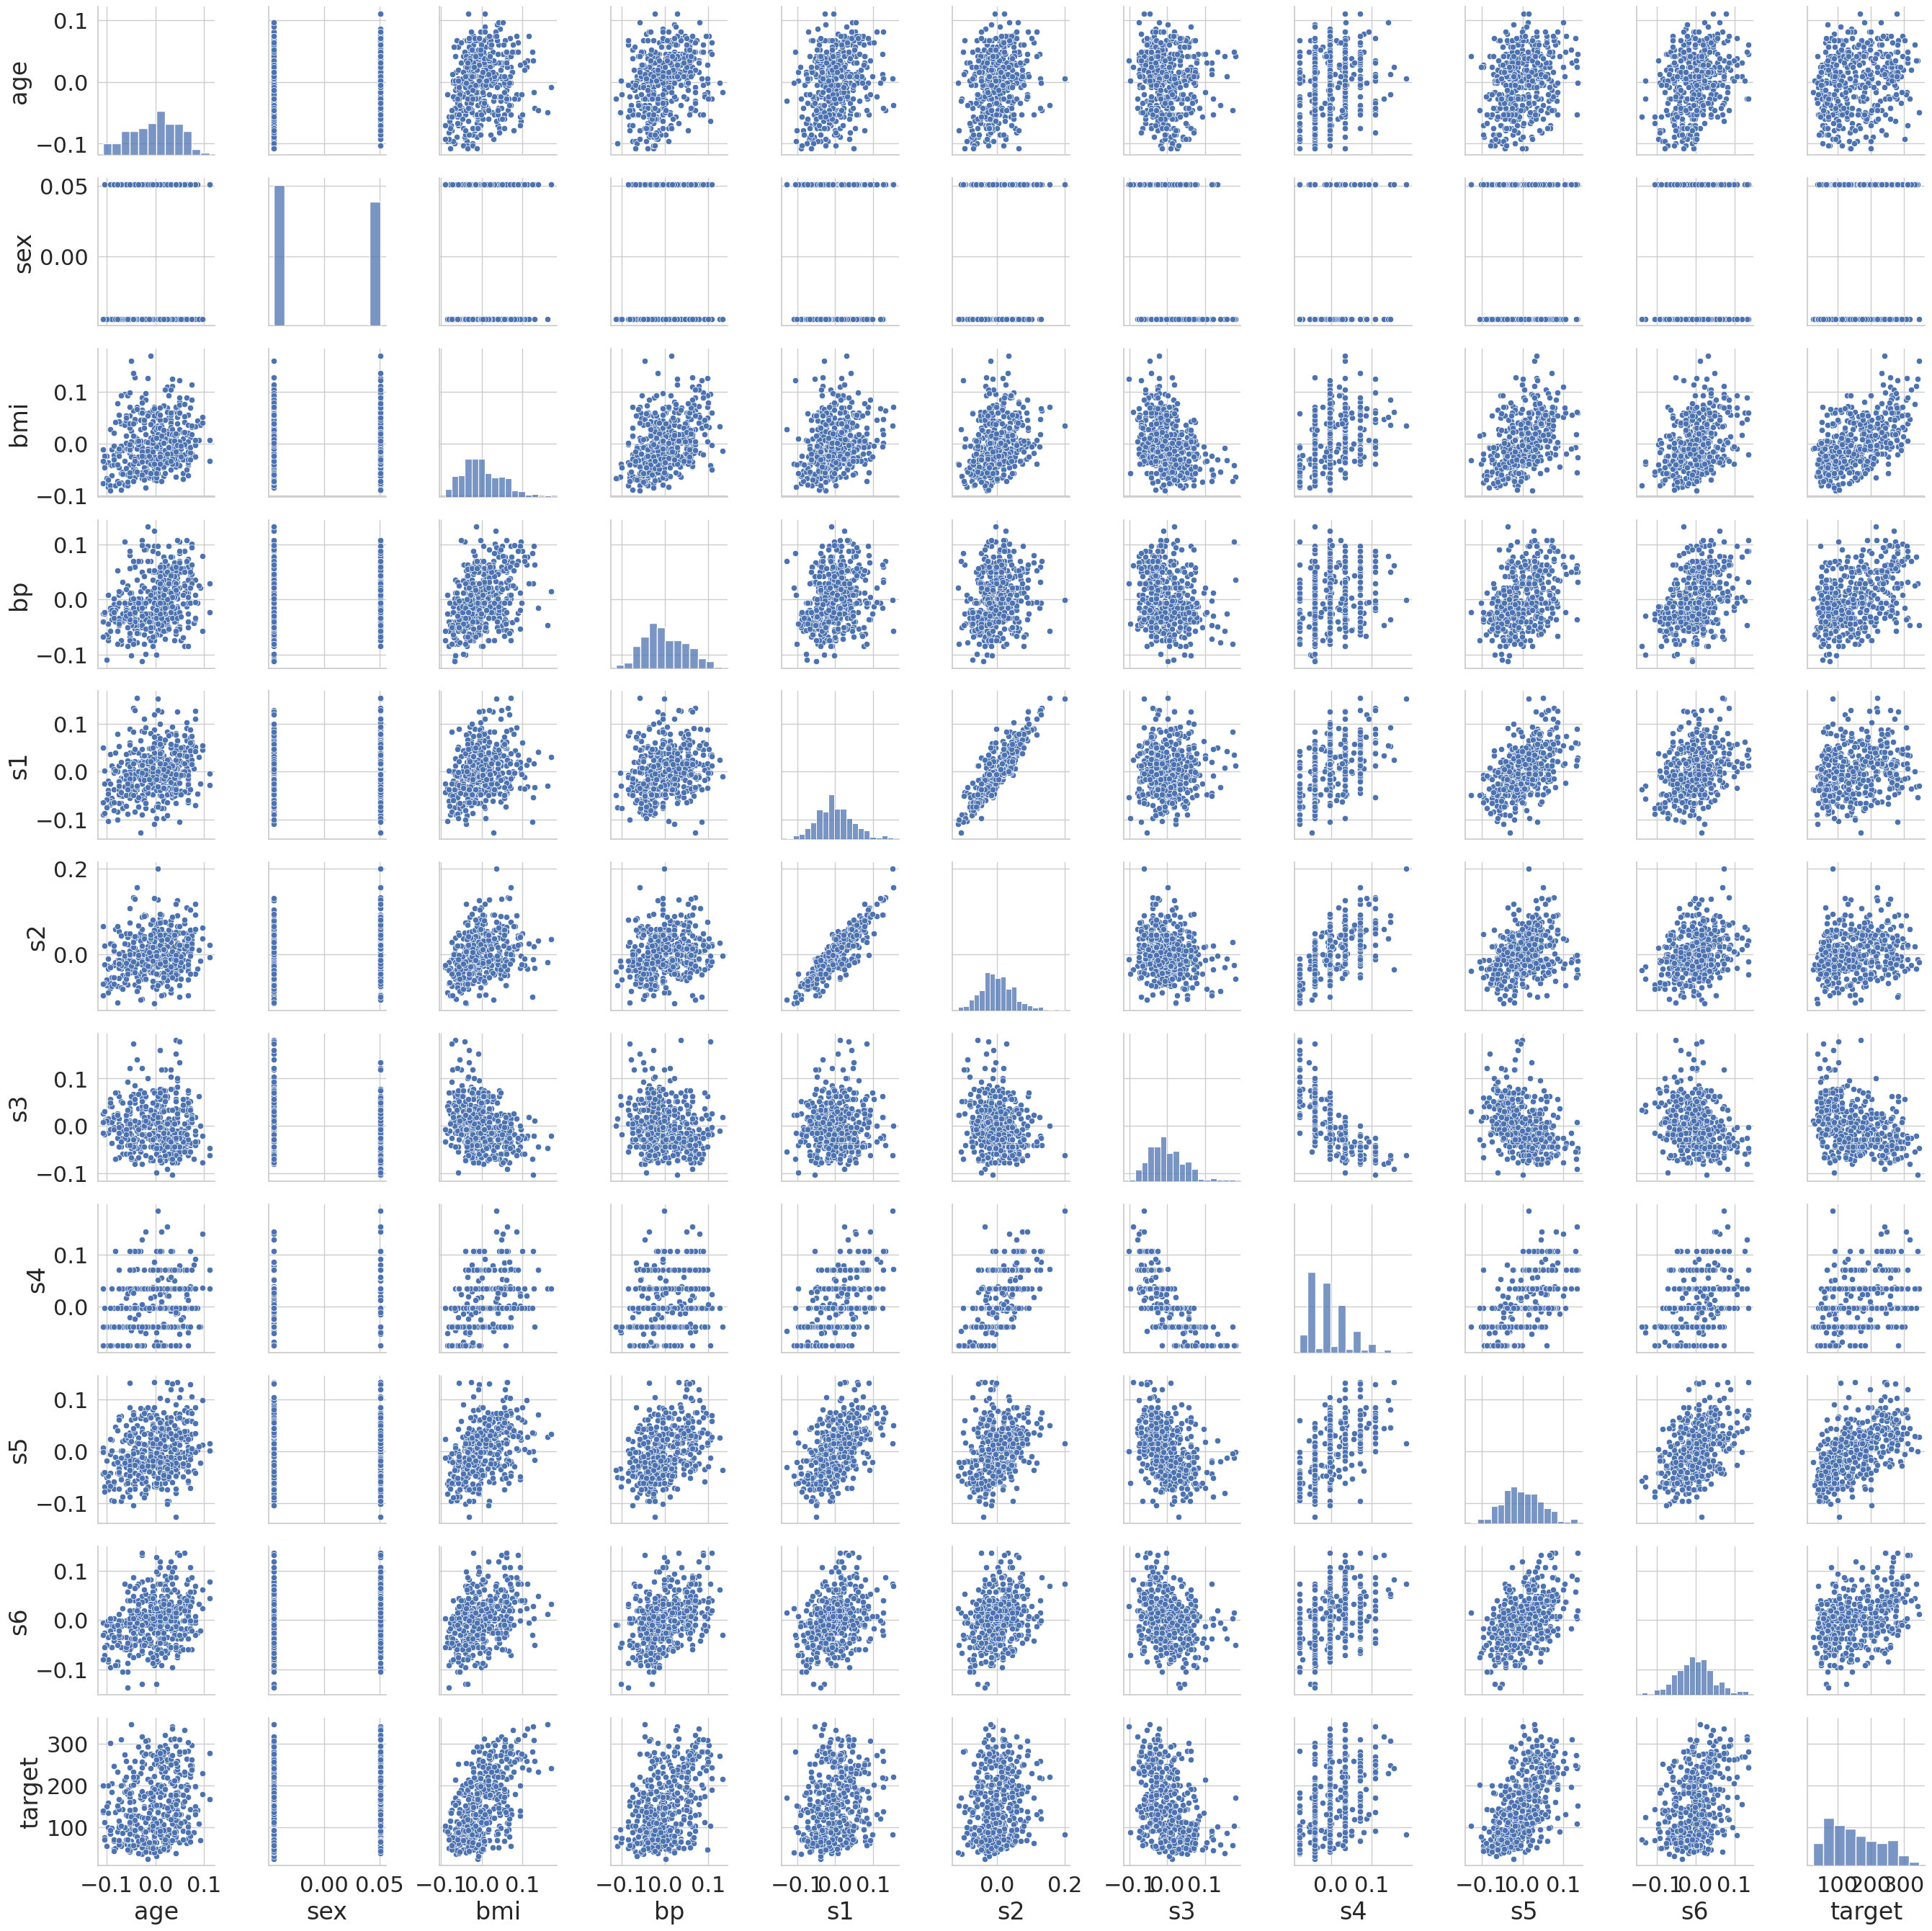

       age: -60.21981405677291
       sex: -266.45705232203574
       bmi: 523.0634112596993
        bp: 310.5134699670048
        s1: -336.1614738106944
        s2: 137.3392923842451
        s3: -131.13923283453653
        s4: -1.1492348017315557
        s5: 622.3286855688128
        s6: 60.466457691682535
predicted: 115.46, expected: 79.00
predicted: 230.56, expected: 321.00
predicted: 160.21, expected: 95.00
predicted: 82.26, expected: 60.00
predicted: 53.86, expected: 57.00
predicted: 154.51, expected: 134.00
predicted: 186.21, expected: 232.00
predicted: 126.68, expected: 68.00
predicted: 86.44, expected: 42.00
predicted: 165.97, expected: 151.00
predicted: 175.28, expected: 107.00
predicted: 113.97, expected: 63.00
predicted: 76.69, expected: 48.00
predicted: 102.98, expected: 118.00
predicted: 190.73, expected: 202.00
predicted: 241.49, expected: 306.00
predicted: 234.02, expected: 152.00
predicted: 251.54, expected: 233.00
predicted: 104.53, expected: 135.00
predicted: 59.16, e

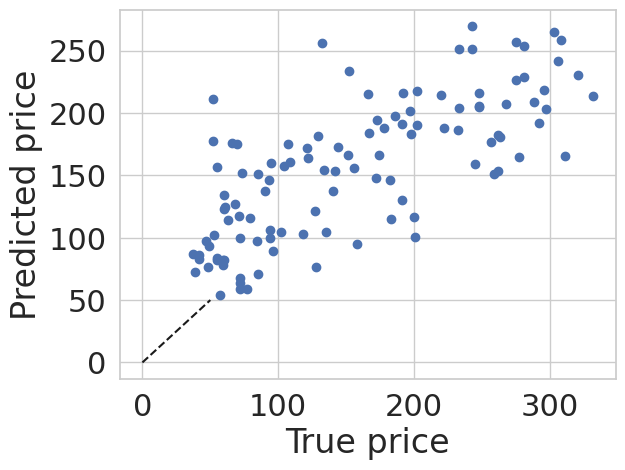

MAE: 47.17126642169844
MSE: 3458.2307025173577
[0.42955615 0.52259939 0.48268054 0.42649776 0.55024834]


In [67]:
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt

# Loading the data
diabetes = datasets.load_diabetes()
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

# Exploring the data
pd.set_option('display.precision', 4)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)
diabetes_df = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target
diabetes_df.head()
diabetes_df.describe()

# Visualizing the data
sns.set(font_scale=2)
sns.set_style("whitegrid")
for feature in diabetes.feature_names:
  plt.figure(figsize=(16, 9))
sns.pairplot(diabetes_df)
plt.show()

# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=11)
X_train.shape
X_test.shape

# Training the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X=X_train, y=y_train)
for i, name in enumerate(diabetes.feature_names):
  print(f'{name:>10}: {lr.coef_[i]}')

# Evaluating the model
predicted = lr.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
  print(f'predicted: {p:.2f}, expected: {e:.2f}')
print(f'lr.score(X_test, y_test): {lr.score(X_test, y_test)}')

# Visualizing the expected v predicted prices
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price')
plt.ylabel('Predicted price')
plt.show()

# Regression model metrics
from sklearn import metrics
import numpy as np
print(f'MAE: {metrics.mean_absolute_error(expected, predicted)}')
print(f'MSE: {metrics.mean_squared_error(expected, predicted)}')

# Choosing the best model
from sklearn.model_selection import cross_val_score
lr = LinearRegression()
cv_results = cross_val_score(lr, diabetes.data, diabetes.target, cv=5)
print(cv_results)


